https://pythonaki.wordpress.com/2018/11/13/lineaarinen-regressio-3/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [3]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [4]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


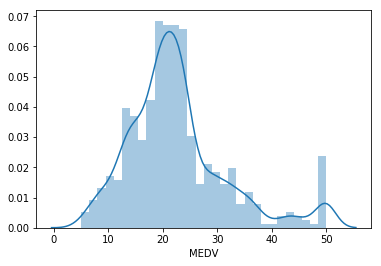

In [7]:
sns.distplot(boston['MEDV'], bins=30)

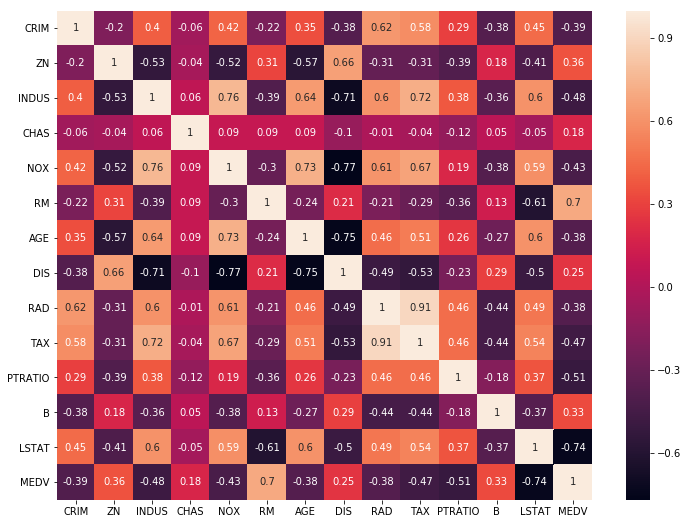

In [8]:
correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=correlation_matrix, annot=True)

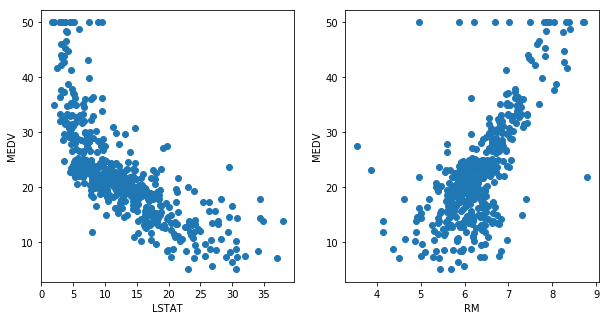

In [9]:
features = ['LSTAT', 'RM']
target = boston['MEDV']
plt.figure(figsize=(10, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    plt.scatter(boston[col],target)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [10]:
X = boston[['LSTAT', 'RM']]
y = boston['MEDV']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [12]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression()
malli.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
malli.intercept_

2.7362403426066138

In [14]:
malli.coef_

array([-0.71722954,  4.58938833])

In [17]:
from sklearn.metrics import mean_squared_error

y_train_predict = malli.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = malli.score(X_train,y_train)

print('Mallin sopivuus opetusdataan')
print("--------------------------------------")
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))
print("\n")

y_test_predict = malli.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = malli.score(X_test, y_test)

print('Mallin sopivuus testidataan')
print('--------------------------------------')
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))

Mallin sopivuus opetusdataan
--------------------------------------
Keskivirhe: 5.6371293350711955
Selityskerroin: 0.6300745149331701


Mallin sopivuus testidataan
--------------------------------------
Keskivirhe: 5.137400784702911
Selityskerroin: 0.6628996975186953


Text(0,0.5,'y_test_predict')

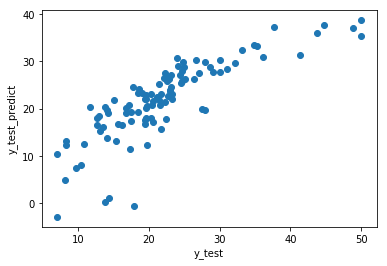

In [18]:
plt.scatter(y_test, y_test_predict)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')